In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = '../train_images_modified'
images = []
char_class = []
matra_class = []
total_class = []
for filename in os.listdir(PATH):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(PATH,filename),0)
        size = np.size(img)
        skel = np.zeros(img.shape,np.uint8)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        a,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#KEDIT
        img = cv2.bitwise_not(img)
        element = cv2.getStructuringElement(cv2.MORPH_CROSS,(9,9))
        done = 0
        while( done < 1 ):
            eroded = cv2.erode(img,element)
            temp = cv2.dilate(eroded,element)
            temp = cv2.subtract(img,temp)
            skel = cv2.bitwise_or(skel,temp)
            img = eroded.copy()

            zeros = size - cv2.countNonZero(img)
            if zeros==size:#cv2.countNonZero(img) * 1 >= 0:#
                done += 1
        img = skel
        #img = cv2.resize(img,(64,64))/255.
        img = cv2.bitwise_not(img)
        top = int((224 - img.shape[0])/2)
        left = int((224 - img.shape[1])/2)
        bottom = 224 - img.shape[0] - top
        right = 224 - img.shape[1] - left
        #img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
        #img = img/255.
        img = cv2.resize(img, (50,50)) #KADD
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        #a,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)# KADD
        char_arr = filename[:-4].split('_')[3:]
        if(len(char_arr)>0):
            images.append(img)
            if len(images)%100==0:
                print("{} Done".format(len(images)))
            total_class.append(char_arr)
            #KEDIT char_class.append([char_arr[0]])
            char_class.append(char_arr[0]) #KEDIT
            if(len(char_arr)>1):          
                matra_class.append(char_arr[1:])
            
        #image_class.append(char_arr)
print(len(images))
print(len(char_class))
print(images[0])
print(char_class[0])

100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done
1895
1895
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ...,   0 124 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]
2325


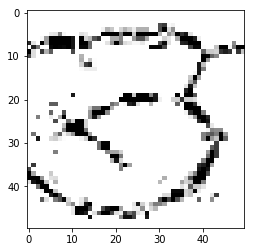

1895


In [3]:
plt.imshow(images[100],"gray")
plt.show()
print(len(images))

# KADD:

In [7]:
x_data = np.reshape(np.array(images)/255, (-1, 50*50))
y_data = np.array(char_class)

df = pd.DataFrame(x_data, y_data)
df['LABEL'] = df.index

df_no_label = df.drop(columns = ['LABEL'])

print(df.head())

TypeError: drop() got an unexpected keyword argument 'columns'

In [380]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=0.1)#n_estimators=1000, max_leaf_nodes=40, max_depth=10, max_features=500)
clf.fit(df_no_label[:1500], df['LABEL'][:1500])
#preds = clf.predict(df[0:2499][1500:])
print(df_no_label.head())
print(clf.score(df_no_label[:1500], df['LABEL'][:1500]))
print(clf.score(df_no_label[1500:], df['LABEL'][1500:]))
'''
rc = 0
wc = 0
for i in range(len(preds)):
    if preds[i] == df['LABEL'][i]:
        rc += 1
    else:
        wc += 1

print('correctly classified {} instances, and misclassified {} instances, proportion is {}'.format(rc, wc, rc/(rc+wc)))
'''

      0     1     2     3     4     5     6     7     8     9     ...   2490  \
2313   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    1.0   
2352   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    1.0   
2340   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    1.0   
2312   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    1.0   
2344   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    0.0   

      2491  2492  2493  2494  2495  2496  2497  2498  2499  
2313   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2352   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2340   1.0   1.0   1.0   1.0   1.0   0.0   0.4   1.0   1.0  
2312   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2344   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  

[5 rows x 2500 columns]
0.992
0.145728643216


"\nrc = 0\nwc = 0\nfor i in range(len(preds)):\n    if preds[i] == df['LABEL'][i]:\n        rc += 1\n    else:\n        wc += 1\n\nprint('correctly classified {} instances, and misclassified {} instances, proportion is {}'.format(rc, wc, rc/(rc+wc)))\n"

In [374]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [370]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split

#print(df.head())
#print(df_no_label)
#print(df['LABEL'])

X_train,X_val,y_train,y_val = train_test_split(df_no_label, df['LABEL'])

print(X_train.shape)
print(X_val.shape)

clf = RandomForestClassifier(max_features=0.9)
clf.fit(X_train, y_train)

scores = cross_val_score(clf, df_no_label, df['LABEL'], cv=3)
print(scores)
scores_f1 = f1_score(clf.predict(X_train),y_train,average='weighted')
print(scores_f1)
scores_f1 = f1_score(clf.predict(X_val),y_val,average='weighted')
print(scores_f1)

(1423, 2500)
(475, 2500)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[ 0.15525114  0.15421304  0.15849673]
0.997216452122
0.179174211901


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [192]:
len(total_class)

1898

In [193]:
import itertools
char_class_types = list(itertools.chain.from_iterable(char_class))
#char_class_types = set([int(i) for i in char_class_types])
char_class_types = set(char_class_types)
len(char_class_types)

57

In [194]:
matra_class_types = list(itertools.chain.from_iterable(matra_class))
#matra_class_types = set([int(i) for i in matra_class_types])
matra_class_types = set(matra_class_types)
len(matra_class_types)

47

In [195]:
total_char_set = char_class_types.union(matra_class_types)
len(total_char_set)

77

In [196]:
total_char_list = sorted(list(total_char_set))

In [197]:
total_char_dict = {total_char_list[i]:i for i in range(len(total_char_list))}

In [198]:
list(itertools.chain.from_iterable(char_class))

['2313',
 '2352',
 '2340',
 '2312',
 '2344',
 '2361',
 '2312',
 '2344',
 '2346',
 '2325',
 '2340',
 '2354',
 '2347',
 '2360',
 '2352',
 '2325',
 '2348',
 '2315',
 '2346',
 '2361',
 '2350',
 '2332',
 '2354',
 '2354',
 '2346',
 '2351',
 '2344',
 '2348',
 '2306',
 '2361',
 '2340',
 '2361',
 '2352',
 '2350',
 '2352',
 '2411',
 '2327',
 '2344',
 '2315',
 '2357',
 '2315',
 '2346',
 '2361',
 '2350',
 '2346',
 '2340',
 '2344',
 '2350',
 '2351',
 '2327',
 '2359',
 '2361',
 '2352',
 '2360',
 '2348',
 '2344',
 '2346',
 '2361',
 '2350',
 '2360',
 '2332',
 '2340',
 '2360',
 '2351',
 '2344',
 '2325',
 '2360',
 '2352',
 '2336',
 '2354',
 '2352',
 '2352',
 '2404',
 '2346',
 '2312',
 '2354',
 '2360',
 '2361',
 '2343',
 '2361',
 '2354',
 '2312',
 '2311',
 '2344',
 '2325',
 '2352',
 '2340',
 '2346',
 '2361',
 '2360',
 '2327',
 '2334',
 '2340',
 '2346',
 '2344',
 '2360',
 '2346',
 '2352',
 '2360',
 '2360',
 '2352',
 '2361',
 '2315',
 '2346',
 '2325',
 '2407',
 '2342',
 '2352',
 '2325',
 '2340',
 '2332',
 

In [79]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
le.fit(list(itertools.chain.from_iterable(char_class)))
y_labeled = le.transform(list(itertools.chain.from_iterable(char_class)))

In [80]:
y_train2 = []
for char in total_class:
    y_train2_char = np.zeros(len(total_char_list))
    for element in char:
        y_train2_char[total_char_dict[element]] = 1
    y_train2.append(y_train2_char)

In [81]:
y_train2[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [82]:
y_train2 = np.array(y_train2)
np.array(images).shape

(1963, 224, 224)

In [83]:
X_train = np.reshape(np.array(images),(-1,224,224,1))
#char_int = [int(i) for i in list(itertools.chain.from_iterable(char_class))]
y_train = np_utils.to_categorical(y_labeled)

In [84]:
len(y_train2[0])

80

In [96]:
model = Sequential()

model.add(Dense(256,input_shape=(224*224,),activation = 'sigmoid'))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dense(len(total_char_set),activation = 'sigmoid'))

print(model.summary())
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5),'accuracy'])
X_train = X_train.reshape((-1,224*224))
model.fit(X_train,y_train2,epochs=10,batch_size=32,validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               12845312  
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 80)                10320     
Total params: 12,905,040
Trainable params: 12,905,040
Non-trainable params: 0
_________________________________________________________________
None
Train on 1374 samples, validate on 589 samples
Epoch 1/10
1374/1374 [==============================] - 14s 10ms/step - loss: 6.4939 - score: 0.0886 - acc: 0.0182 - val_loss: 6.6137 - val_score: 0.0999 - val_acc: 0.0051
Epoch 2/10
1374/1374 [================

KeyboardInterrupt: 

In [90]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (224,224,1),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(len(total_char_set),activation = 'sigmoid'))

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 16)      160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 32)        0         
__________

In [87]:
import keras.backend as K

def f1_score(theta):
    def score(y_true, y_pred):

        y_thresh = K.cast(K.greater(y_pred,theta),K.floatx())

        true_pos =  K.sum(y_true * y_thresh)
        false_pos = K.sum(y_true * (1. - y_thresh))
        false_neg = K.sum((1. - y_true) * y_thresh)

        precision = true_pos / (true_pos + false_pos)
        recall = true_pos / (true_pos + false_neg)
        
        f1_score_val = 2 * (precision * recall) / (precision + recall)
        return f1_score_val
    return score

def custom_metric(y_true, y_pred):
    return K.cast(K.equal(y_true,
                          K.round(y_pred)),
                  K.floatx())


In [88]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5)])

In [89]:
model.fit(X_train,y_train2,epochs=10,batch_size=32,validation_split=0.3)

Train on 1374 samples, validate on 589 samples
Epoch 1/10
1374/1374 [==============================] - 138s 101ms/step - loss: 6.3004 - score: 0.0907 - val_loss: 6.6307 - val_score: 0.1009
Epoch 2/10
1374/1374 [==============================] - 139s 101ms/step - loss: 6.0385 - score: 0.1098 - val_loss: 6.6040 - val_score: 0.1103
Epoch 3/10
1374/1374 [==============================] - 135s 98ms/step - loss: 6.0297 - score: 0.1186 - val_loss: 6.6003 - val_score: 0.1219
Epoch 4/10
1374/1374 [==============================] - 144s 105ms/step - loss: 6.0206 - score: 0.1207 - val_loss: 6.5908 - val_score: 0.1273
Epoch 5/10
  96/1374 [=>............................] - ETA: 1:51 - loss: 5.9091 - score: 0.1123

KeyboardInterrupt: 

In [ ]:
preds = model.predict(X_train)

In [157]:
labels = np.zeros(preds[0].shape)
labels[preds[5]>0.5] = 1
labels[0]

0.0